# Assignment 7
### Do any five.

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from random import sample


In [3]:
metabric=pd.read_csv("metabric.csv")
metabric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Diagnosis               1343 non-null   float64
 1   Type of Breast Surgery         1343 non-null   object 
 2   Cancer Type                    1343 non-null   object 
 3   Chemotherapy                   1343 non-null   object 
 4   Hormone Therapy                1343 non-null   object 
 5   Lymph nodes examined positive  1343 non-null   float64
 6   Mutation Count                 1343 non-null   float64
 7   Nottingham prognostic index    1343 non-null   float64
 8   Overall Survival (Months)      1343 non-null   float64
 9   Overall Survival Status        1343 non-null   object 
 10  Radio Therapy                  1343 non-null   object 
 11  TMB (nonsynonymous)            1343 non-null   float64
 12  Tumor Size                     1343 non-null   f

<Axes: xlabel='Radio Therapy', ylabel='Count'>

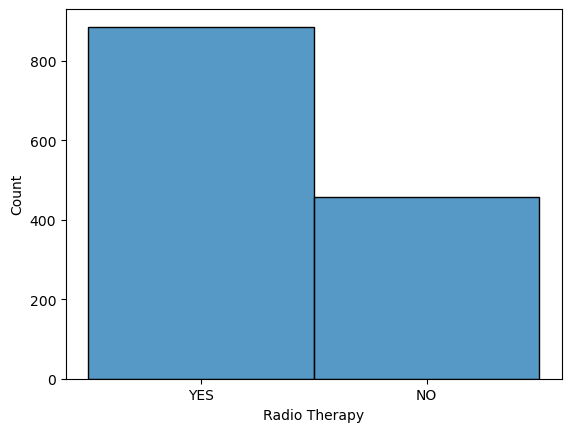

In [4]:
sns.histplot(metabric["Radio Therapy"])

## Likelihood:

$L(p)=\prod p^{y_i}(1-p)^{1-y_i}$

$log(L)=log(\prod p^{y_i}(1-p)^{1-y_i})$

Use Log Property: log(ab)=log(a) + log(b)

$L=\sum{log(p^{y_i}(1-p)^{1-x_i})}$



$L=\sum{y_i(log(p))+(1-y_i)log(1-p)}$

Take the derivative:

$derivative(L)=\sum{y_i \frac{1}{p}-(1-y_i)\frac{1}{1-p}}$

Set the likelihood as 0:

$\sum{y_i \frac{1}{p}=(1-y_i)\frac{1}{1-p}}$

$p=\frac{1}{n}\sum{y_i}$

In [15]:
metabric["RT_Binary"]=metabric["Radio Therapy"]
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,RT_Binary
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,YES
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,NO
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,YES
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,YES
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,YES


In [16]:
metabric["RT_Binary"]=metabric["RT_Binary"].replace({"YES":1,"NO":0})
metabric.head()

/tmp/ipykernel_5984/1522456996.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  metabric["RT_Binary"]=metabric["RT_Binary"].replace({"YES":1,"NO":0})


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,RT_Binary
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,1
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,1


In [17]:
metabric["RT_Binary"].value_counts()

RT_Binary
1    886
0    457
Name: count, dtype: int64

In [29]:
y=metabric["RT_Binary"].values
y_mean=y.mean()
y_mean, y


(np.float64(0.659717051377513), array([1, 0, 1, ..., 1, 1, 1], shape=(1343,)))

In [ ]:
# Code for the density distribution

In [38]:
# Bootstrapping

y=pd.Series(y)
def bootstrap(y, S=1000):
    estimates=[]
    for s in range(S):
        y_s=y.sample(frac=1, replace=True)
        mean_s=y_s.mean()
        estimates.append(mean_s)
    return np.array(estimates)

bootstrapped_means=bootstrap(y, S=1000)
bootstrapped_means

array([0.65227103, 0.65376024, 0.65003723, 0.66790767, 0.65003723,
       0.67163068, 0.67684289, 0.66120625, 0.6827997 , 0.66269546,
       0.65227103, 0.64259121, 0.65524944, 0.66344006, 0.66195086,
       0.67460908, 0.67088608, 0.65078183, 0.65227103, 0.6827997 ,
       0.67163068, 0.67460908, 0.65524944, 0.68503351, 0.67833209,
       0.65450484, 0.66939687, 0.64854803, 0.67163068, 0.65450484,
       0.66716307, 0.65897245, 0.65301564, 0.64184661, 0.6820551 ,
       0.64780343, 0.64556962, 0.6358898 , 0.68577811, 0.66046165,
       0.66492926, 0.65971705, 0.67311988, 0.66046165, 0.66195086,
       0.65971705, 0.62546538, 0.65003723, 0.67907669, 0.65376024,
       0.65748325, 0.65673864, 0.63961281, 0.66492926, 0.67014147,
       0.65599404, 0.68726731, 0.67088608, 0.6835443 , 0.65078183,
       0.67833209, 0.67386448, 0.64929263, 0.66939687, 0.65748325,
       0.67088608, 0.63886821, 0.67163068, 0.65301564, 0.67311988,
       0.62918838, 0.67163068, 0.64408042, 0.66939687, 0.66567

<Axes: ylabel='Density'>

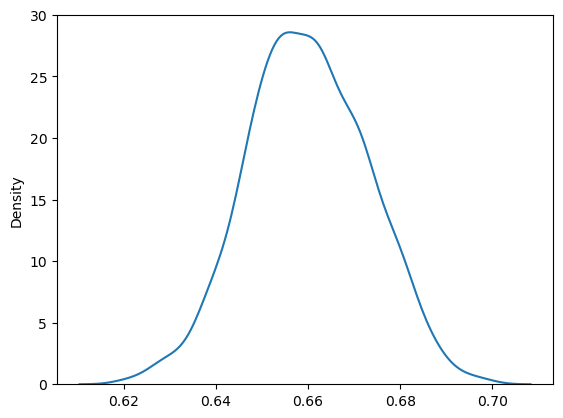

In [39]:
sns.kdeplot(bootstrapped_means)